In [424]:
%matplotlib inline
# Скачиваю и распаковываю датасет

import os
import tarfile
from six.moves import urllib
import matplotlib.pyplot as plt

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [425]:
import pandas as pd

In [426]:
# Сложная загрузка датасета

def loading_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [427]:
housing = loading_housing_data()

In [428]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [429]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [430]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [431]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


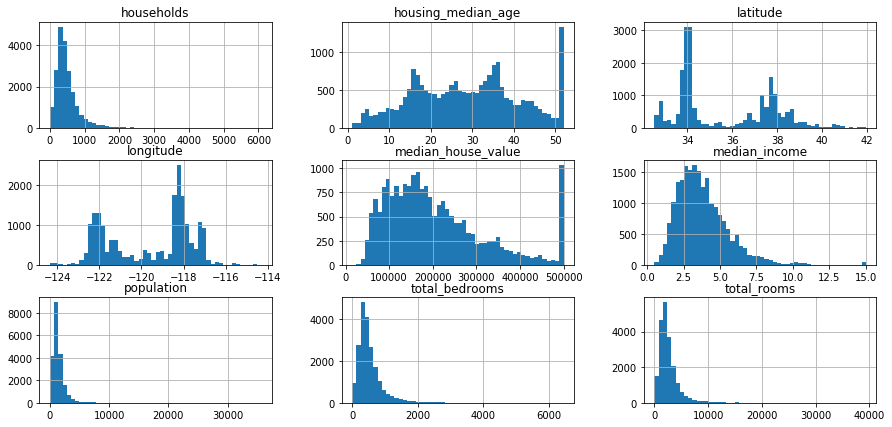

In [432]:
housing.hist(figsize=(15,7), bins=50);

## Испытательный набор

In [433]:
import numpy as np

In [434]:
def split_train_test(data, test_ratio):
    shuffled_indicies = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indicies = shuffled_indicies[:test_set_size]
    train_indicies = shuffled_indicies[test_set_size:]
    return data.iloc[train_indicies], data.iloc[test_indicies]

In [435]:
train_set, test_set = split_train_test(housing, 0.2)

In [436]:
print(len(train_set), 'train +', len(test_set), 'test')

16512 train + 4128 test


In [437]:
from sklearn.model_selection import train_test_split

In [438]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## Преобразование дохода

In [439]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

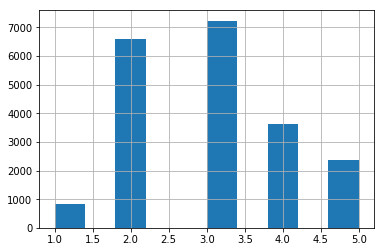

In [440]:
housing['income_cat'].hist();

## Стратифицированная выборка 

In [441]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [442]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [443]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [444]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Визуализация

In [445]:
housing = strat_train_set.copy()

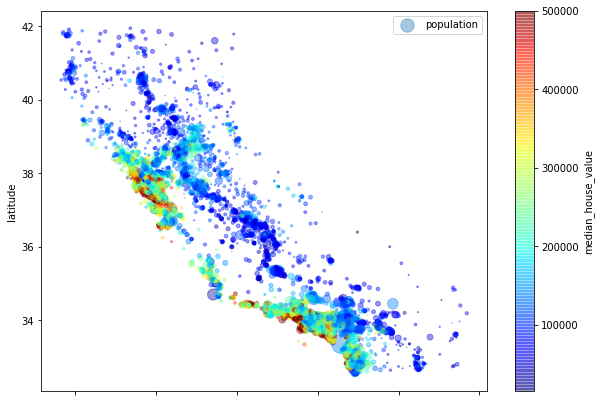

In [446]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
             s=housing['population']/100, label='population',
             figsize=(10,7), c='median_house_value',
             cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend();

In [447]:
corr_matrix = housing.corr()

## Ищем коррелирующие признаки

In [448]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

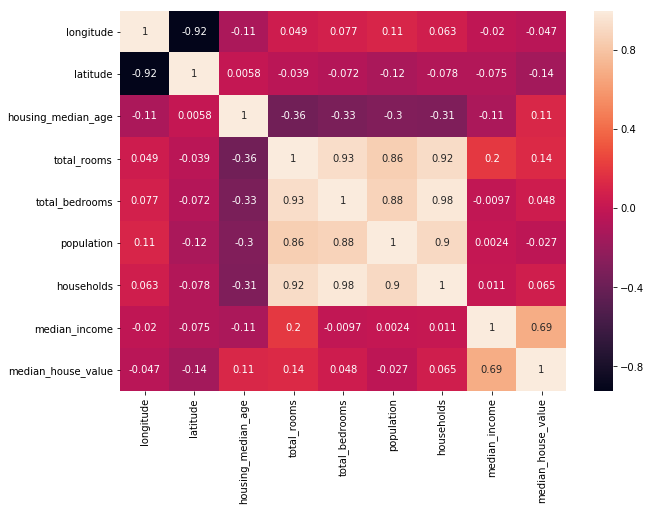

In [449]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, ax=ax, annot=True);

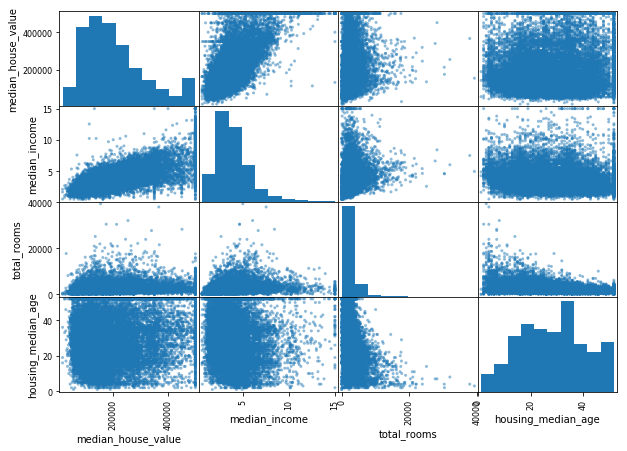

In [450]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(10,7));

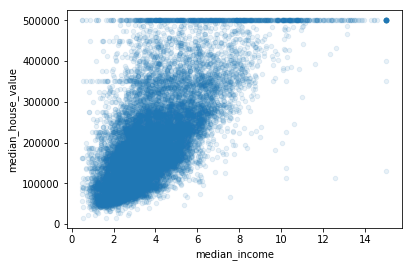

In [451]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);

## Добавим новые признаки

In [452]:
housing['rooms_per_househols'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [453]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_househols         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Готовим данные к алгоритмам МО 

In [454]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Очистка данных

In [455]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [456]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [457]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [458]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [459]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [460]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [461]:
X = imputer.transform(housing_num)

In [462]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [463]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### Обработка категориальных признаков

In [464]:
housing_cat = housing['ocean_proximity']
housing_cat.value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [465]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [466]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [467]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## Пишем свой трансформатор 

In [468]:
from sklearn.base import BaseEstimator, TransformerMixin

In [469]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [470]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [471]:
class CatPreparer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        cat_encoded= pd.factorize(X)
        self.columns = cat_encoded[1]
        return cat_encoded[0].reshape(-1,1)

## Конвейеры трансформации

In [472]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [473]:
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler())
])

In [474]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [475]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if len(self.attribute_names) == 1:
            return X[self.attribute_names[0]].values
        else:
            return X[self.attribute_names].values

In [476]:
num_attribs = list(housing_num)
#num_attribs = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
cat_attribs = ['ocean_proximity']

In [477]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [478]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('preparer', CatPreparer()),
    ('encoder', OneHotEncoder(sparse=False))
])

## Объединяем фичи 

In [479]:
from sklearn.pipeline import FeatureUnion

In [480]:
full_pipeline = FeatureUnion([
    ('num', num_pipeline),
    ('cat', cat_pipeline)
])

In [481]:
housing_prepared = full_pipeline.fit_transform(housing)

## Обучаем модели

### Линейная регрессия

#### Обучение модели

In [482]:
from sklearn.linear_model import LinearRegression

In [483]:
lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [484]:
some_data = housing.iloc[:7000]
some_labels = housing_labels.iloc[:7000]

some_data_prepared = full_pipeline.fit_transform(some_data)

print('Прогнозы:', lin_reg.predict(some_data_prepared)[:5])
print('Метки:', list(housing_labels)[:5])

Прогнозы: [210651.7763801  318274.55538286 211352.74851041  59989.28342054
 193945.11525044]
Метки: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


#### Считаем ошибку

In [485]:
from sklearn.metrics import mean_squared_error

In [486]:
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

### Дерево решений

#### Обучение модели

In [487]:
from sklearn.tree import DecisionTreeRegressor

In [488]:
tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### Считаем ошибку

In [489]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

## Кросс-валидация модели

In [490]:
from sklearn.model_selection import cross_val_score

In [491]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [492]:
def display_scores(scores):
    print('Суммы оценок:', scores)
    print('Среднее:', scores.mean())
    print('Стандартное отклонение', scores.std())

In [493]:
display_scores(tree_rmse_scores)

Суммы оценок: [70124.50601944 67537.23893006 71495.13806863 69232.7466513
 70419.37127181 74842.6430483  71092.87234512 70860.90246163
 76532.37982474 69289.15971544]
Среднее: 71142.69583364735
Стандартное отклонение 2541.3999833240778


In [494]:
lin_reg_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_reg_scores)

In [495]:
display_scores(lin_rmse_scores)

Суммы оценок: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Среднее: 69052.46136345083
Стандартное отклонение 2731.674001798347


### Случайный лес

#### Обучение модели

In [496]:
from sklearn.ensemble import RandomForestRegressor

In [497]:
forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Считаем ошибку

In [498]:
housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_predictions, housing_labels)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

22370.613387769707

In [499]:
forest_reg_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_reg_scores)

display_scores(forest_rmse_scores)

Суммы оценок: [50910.4222772  50997.33687786 51057.65789516 55516.49953278
 52797.84821994 55438.87342767 50305.98371173 50326.73637732
 55902.2018118  53189.66690841]
Среднее: 52644.32270398793
Стандартное отклонение 2146.3730801249203


### Метод опорных векторов

#### Обучаем модель

In [513]:
from sklearn.svm import SVR

In [517]:
svr = SVR()

svr.fit(housing_prepared, housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Считаем ошибку

In [518]:
housing_predictions = svr.predict(housing_prepared)

svr_mse = mean_squared_error(housing_predictions, housing_labels)
svr_rmse = np.sqrt(svr_mse)

svr_rmse

118577.43356412371

In [520]:
svr_reg_scores = cross_val_score(svr, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-svr_reg_scores)

display_scores(svr_rmse_scores)

Суммы оценок: [111393.33263237 119546.71049753 116961.00489445 120449.0155974
 117622.20149716 122303.76986818 117640.09907103 121459.63518806
 120348.51364519 118025.61954959]
Среднее: 118574.99024409598
Стандартное отклонение 2934.1329433145675


## Сохраняем модели

In [500]:
from sklearn.externals import joblib

In [501]:
joblib.dump(lin_reg, 'models/lin_reg.pkl')
joblib.dump(tree_reg, 'models/tree_reg.pkl')
joblib.dump(forest_reg, 'models/forest_reg.pkl')

['models/forest_reg.pkl']

In [502]:
joblib.load('models/lin_reg.pkl')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Решетчатый поиск

In [503]:
from sklearn.model_selection import GridSearchCV

### Метод опорных векторов

In [525]:
param_grid = [
    {'kernel': ['linear', 'rbf'], "C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}
]

svr_reg = SVR()

grid_search = GridSearchCV(svr_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [1.0, 10.0, 100.0, 1000.0], 'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [526]:
grid_search.best_params_

{'C': 1000.0, 'gamma': 0.01, 'kernel': 'linear'}

In [535]:
joblib.dump(grid_search.best_params_, 'models/svr.pkl')

['models/svr.pkl']

### Случайный лес

In [504]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [505]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [506]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63380.504680356564 {'max_features': 2, 'n_estimators': 3}
55749.95330747236 {'max_features': 2, 'n_estimators': 10}
52944.0936439319 {'max_features': 2, 'n_estimators': 30}
60520.533679394604 {'max_features': 4, 'n_estimators': 3}
52574.69597519878 {'max_features': 4, 'n_estimators': 10}
50656.00709925644 {'max_features': 4, 'n_estimators': 30}
59712.99162105986 {'max_features': 6, 'n_estimators': 3}
52658.85477712808 {'max_features': 6, 'n_estimators': 10}
50164.22894377873 {'max_features': 6, 'n_estimators': 30}
59008.562742616225 {'max_features': 8, 'n_estimators': 3}
51766.50692404805 {'max_features': 8, 'n_estimators': 10}
50097.75147496629 {'max_features': 8, 'n_estimators': 30}
62709.63326695131 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54591.627824994765 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59098.18267725201 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52736.553487678284 {'bootstrap': False, 'max_features': 3, 'n_estimators'

## Анализ лучших моделей и ошибок

In [527]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

AttributeError: 'SVR' object has no attribute 'feature_importances_'

In [528]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = cat_pipeline.named_steps['preparer'].columns
attributes = num_attribs + extra_attribs + list(cat_encoder)

In [510]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3805252095470878, 'median_income'),
 (0.1575907304491554, 'INLAND'),
 (0.11109011900670619, 'pop_per_hhold'),
 (0.06633616905296139, 'longitude'),
 (0.05833156832521596, 'latitude'),
 (0.056691790262518325, 'rooms_per_hhold'),
 (0.05125697420762246, 'bedrooms_per_room'),
 (0.04428834498917254, 'housing_median_age'),
 (0.01568118518476596, 'population'),
 (0.015405497192200988, 'households'),
 (0.015261307808758713, 'total_rooms'),
 (0.014663474867889385, 'total_bedrooms'),
 (0.007524136931828905, '<1H OCEAN'),
 (0.0032547277214891143, 'NEAR OCEAN'),
 (0.0020411669303896326, 'NEAR BAY'),
 (5.7597522237261964e-05, 'ISLAND')]

## Оценка системы

In [529]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

75762.44635374569

## Случайный поиск

In [536]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 13.9min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 22.2min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=4,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000168987096A0>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000168987091D0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [537]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54767.99053704408

In [538]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

## Выделим топ фич

In [539]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [540]:
k = 5

In [543]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)

In [544]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'NEAR OCEAN'], dtype='<U18')

In [545]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3805252095470878, 'median_income'),
 (0.1575907304491554, 'NEAR OCEAN'),
 (0.11109011900670619, 'pop_per_hhold'),
 (0.06633616905296139, 'longitude'),
 (0.05833156832521596, 'latitude')]

In [546]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [547]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [548]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [549]:
housing_prepared[0:3, top_k_feature_indices]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

## Пайплайн с финальным предсказанием

In [550]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [551]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('imputer',... gamma=0.26497040005002437, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [552]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

final_predictions = prepare_select_and_predict_pipeline.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

76501.6991121172

## Выбираем размер топа

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(housing, housing_labels)

grid_search_prep.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

grid_search_prep.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse